In [1]:
import numpy as np
import pandas as pd
import missingno
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

In [2]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.pipeline import Pipeline
from sklearn import preprocessing


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv("data.train", header= None)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,25,0.08,8777,77,2,28.29,c
1,28,0.07,3182,34,4,26.76,a
2,19,0.03,7624,34,0,33.60,b
3,40,0.05,5443,89,4,31.61,b
4,16,0.02,1215,89,0,22.34,a


In [5]:
headers=['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio' , 'class']
df.columns=headers # replace default header by given data

In [6]:
df.head() 

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,class
0,25,0.08,8777,77,2,28.29,c
1,28,0.07,3182,34,4,26.76,a
2,19,0.03,7624,34,0,33.60,b
3,40,0.05,5443,89,4,31.61,b
4,16,0.02,1215,89,0,22.34,a


In [7]:
df.shape #shape of the array

(300, 7)

In [8]:
df.ndim #dimension of the array

2

# 1. Getting Started Analyzing data

In [9]:
df.describe()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,29.776667,0.052900,4961.773333,49.540000,2.863333,23.489700
std,11.863780,0.023899,2301.284968,23.669161,2.296862,6.163415
min,10.000000,0.010000,1035.000000,12.000000,0.000000,12.250000
25%,20.000000,0.030000,2952.000000,34.000000,1.000000,18.975000
50%,30.000000,0.050000,4958.500000,42.000000,3.000000,23.225000
75%,40.000000,0.070000,6861.250000,77.000000,4.000000,28.385000
max,50.000000,0.090000,8966.000000,89.000000,7.000000,34.540000


In [10]:
df.dtypes  #data types

age                   int64
rok_index           float64
rok_summation         int64
promo_value           int64
event_value           int64
conversion_ratio    float64
class                object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
age                 300 non-null int64
rok_index           300 non-null float64
rok_summation       300 non-null int64
promo_value         300 non-null int64
event_value         300 non-null int64
conversion_ratio    300 non-null float64
class               300 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 16.5+ KB


In [12]:
#Checking missing values
df.isna().sum()

age                 0
rok_index           0
rok_summation       0
promo_value         0
event_value         0
conversion_ratio    0
class               0
dtype: int64

In [13]:
#Count : Number of classes
df['class'].value_counts()

b    106
c     97
a     97
Name: class, dtype: int64

In [14]:
# The classes ratio.
print('a =', round(df['class'].value_counts()['a']/len(df) * 100,2), '% of the dataset')
print('b =', round(df['class'].value_counts()['b']/len(df) * 100,2), '% of the dataset')
print('c =', round(df['class'].value_counts()['c']/len(df) * 100,2), '% of the dataset')

a = 32.33 % of the dataset
b = 35.33 % of the dataset
c = 32.33 % of the dataset


In [15]:
#Here, we convert our class into label from string to integer value
label = df['class'].replace({
    'a':1,
    'b':2,
    'c':3
})

In [16]:
df['label'] = label

In [17]:
#Show our dataframe with a new coulumn 
df.head()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,class,label
0,25,0.08,8777,77,2,28.29,c,3
1,28,0.07,3182,34,4,26.76,a,1
2,19,0.03,7624,34,0,33.60,b,2
3,40,0.05,5443,89,4,31.61,b,2
4,16,0.02,1215,89,0,22.34,a,1


# 2. Exploratory Data Analysis

In [18]:
cols_target = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio','label']


In [19]:
data = df[cols_target]

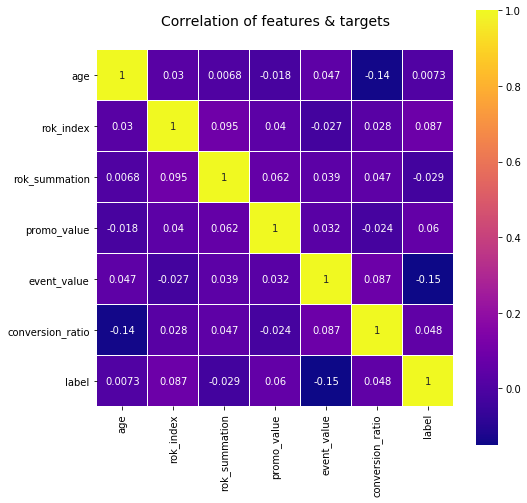

In [20]:
#Heat Map of the dataset
colormap = plt.cm.plasma
plt.figure(figsize=(8,8))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

# 2.1 Central tendencies of data

In [21]:
df1=df.copy()

In [22]:
X=df1.drop(['class'],axis=1)
Y=df1['class']

In [23]:
#Mean
np.mean(X)

age                   29.776667
rok_index              0.052900
rok_summation       4961.773333
promo_value           49.540000
event_value            2.863333
conversion_ratio      23.489700
label                  2.000000
dtype: float64

In [24]:
#Median
np.median(X)

16.785

In [25]:
#mode
from scipy import stats
stats.mode(X)

ModeResult(mode=array([[2.200e+01, 7.000e-02, 1.519e+03, 3.400e+01, 4.000e+00, 2.447e+01,
        2.000e+00]]), count=array([[ 12,  45,   2,  57,  59,   3, 106]]))

# 2.2 Fluctuation rates in data field

In [26]:
#Z-Scores
stats.zscore(X, axis=1)

array([[-0.40743896, -0.41557341,  2.44940933, ..., -0.41494668,
        -0.40636503, -0.41462025],
       [-0.39706365, -0.42226956,  2.44931792, ..., -0.41872287,
        -0.39818271, -0.42143027],
       [-0.4066548 , -0.41377911,  2.44945666, ..., -0.41379038,
        -0.40117166, -0.41303927],
       ...,
       [-0.40204933, -0.41275758,  2.4494668 , ..., -0.41209459,
        -0.40172453, -0.41209459],
       [-0.38577803, -0.41921533,  2.44932214, ..., -0.41847026,
        -0.39728113, -0.41847026],
       [-0.38749964, -0.42766093,  2.44910658, ..., -0.42202224,
        -0.40671722, -0.42633756]])

# 2.2.1 Standard Deviation

In [27]:
#Standard Deviation
df.std()

age                   11.863780
rok_index              0.023899
rok_summation       2301.284968
promo_value           23.669161
event_value            2.296862
conversion_ratio       6.163415
label                  0.805499
dtype: float64

# 2.2.2 Varience

In [28]:
#Varience
df.var()

age                 1.407493e+02
rok_index           5.711605e-04
rok_summation       5.295913e+06
promo_value         5.602292e+02
event_value         5.275574e+00
conversion_ratio    3.798769e+01
label               6.488294e-01
dtype: float64

# 2.2.4 Coefficient of Variation

In [31]:
Standard_deviation=np.std(df1)
mean=np.mean(df1)
cv= Standard_deviation / mean
print('Coefficient of Variation:\n',cv)

Coefficient of Variation:
 age                 0.397761
rok_index           0.451023
rok_summation       0.463029
promo_value         0.476982
event_value         0.800826
conversion_ratio    0.261950
label               0.402078
dtype: float64


# 2.2.3 Correlation

In [29]:
#Correlation
df.corr()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,label
age,1.000000,0.029540,0.006835,-0.017506,0.047357,-0.140293,0.007350
rok_index,0.029540,1.000000,0.094887,0.040265,-0.027484,0.028274,0.086867
rok_summation,0.006835,0.094887,1.000000,0.062431,0.038945,0.046601,-0.029007
promo_value,-0.017506,0.040265,0.062431,1.000000,0.031630,-0.023649,0.060169
event_value,0.047357,-0.027484,0.038945,0.031630,1.000000,0.086670,-0.150040
conversion_ratio,-0.140293,0.028274,0.046601,-0.023649,0.086670,1.000000,0.047668
label,0.007350,0.086867,-0.029007,0.060169,-0.150040,0.047668,1.000000


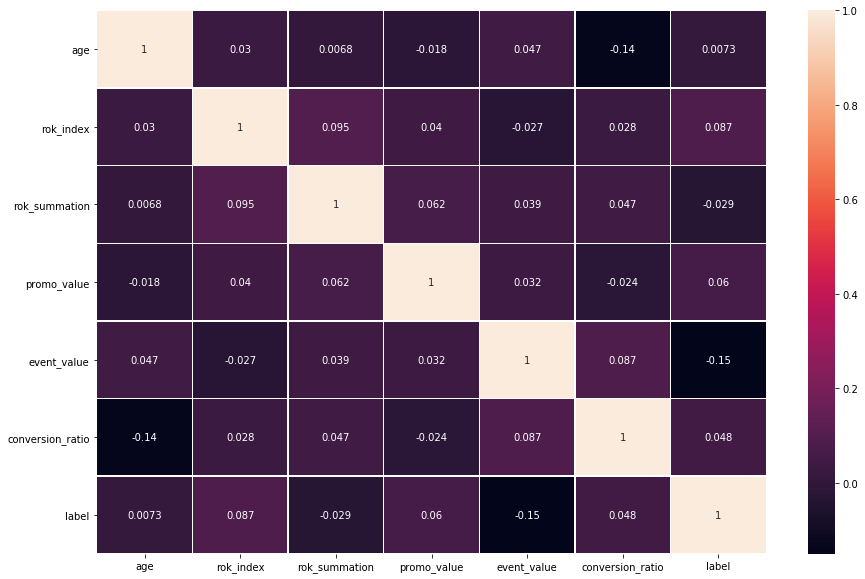

In [30]:
#Heat Map of Correlataion
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,linewidths = 0.5)

# 2.3 Principal component analysis (PCA)    3D

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X=df1.drop(['class', 'label'],axis=1)
y=df1['label']

In [33]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

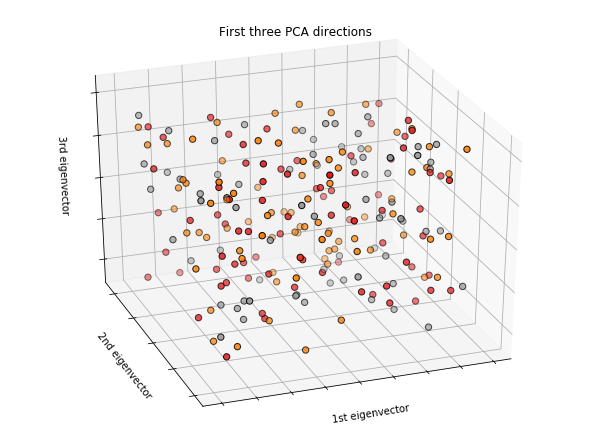

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

p = X_train
q = y_train
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(p)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=q,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# 2.3.1 Principal component analysis (PCA)    2D

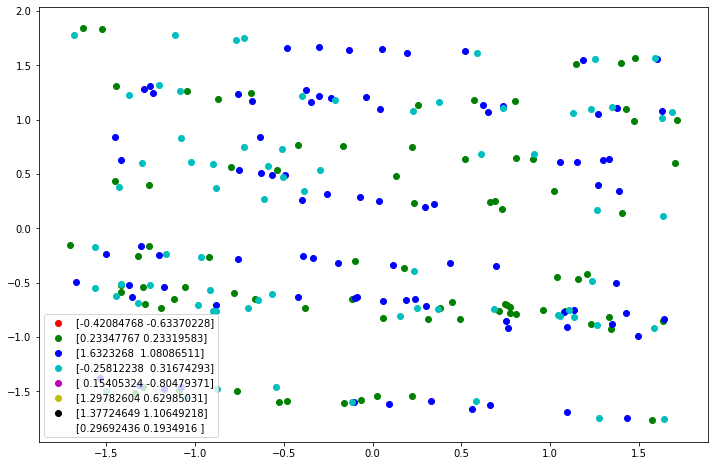

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(p)
X_pca = pca.transform(p)
target_ids = range(len(X_pca))

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
for i, c, label in zip(target_ids, 'rgbcmykw', X_pca):
    plt.scatter(X_pca[q == i, 0], X_pca[q == i, 1],
               c=c, label=label)
plt.legend()
plt.show()

# 2.3.2 t-Distributed Stochastic Neighbor Embedding (t-SNE) 3D

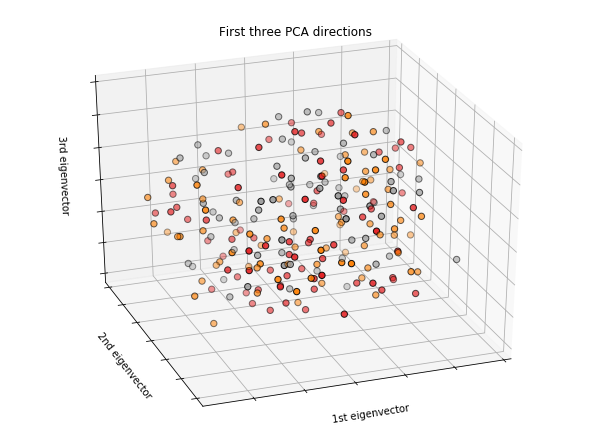

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE

w = X_train
r = y_train
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = TSNE(n_components=3).fit_transform(w)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=r,
           cmap=plt.cm.Set1, edgecolor='k', s=40,label=label)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# 2.4 Pearson Correlation

In [38]:

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
f1=df['age']
f2=df['rok_index']
f3=df['rok_summation']
f4=df['promo_value']
f5=df['event_value']
f6=df['conversion_ratio']
g=df['label']
# calculate Pearson's correlation
corr1, _ = pearsonr(f1,g)
corr2, _ = pearsonr(f2,g)
corr3, _ = pearsonr(f3,g)
corr4, _ = pearsonr(f4,g)
corr5, _ = pearsonr(f5,g)
corr6, _ = pearsonr(f6,g)

print('Pearsons correlation betwwen age and label instead of class is : %.3f' % corr1)
print('Pearsons correlation betwwen rok_index and label instead of class is : %.3f' % corr2)
print('Pearsons correlation betwwen rok_summation and label instead of class is : %.3f' % corr3)
print('Pearsons correlation betwwen promo_value and label instead of class is : %.3f' % corr4)
print('Pearsons correlation betwwen event_value and label instead of class is : %.3f' % corr5)
print('Pearsons correlation betwwen conversion_ratio and label instead of class is : %.3f' % corr6)


Pearsons correlation betwwen age and label instead of class is : 0.007
Pearsons correlation betwwen rok_index and label instead of class is : 0.087
Pearsons correlation betwwen rok_summation and label instead of class is : -0.029
Pearsons correlation betwwen promo_value and label instead of class is : 0.060
Pearsons correlation betwwen event_value and label instead of class is : -0.150
Pearsons correlation betwwen conversion_ratio and label instead of class is : 0.048


# 2.5 Anomalies Findings

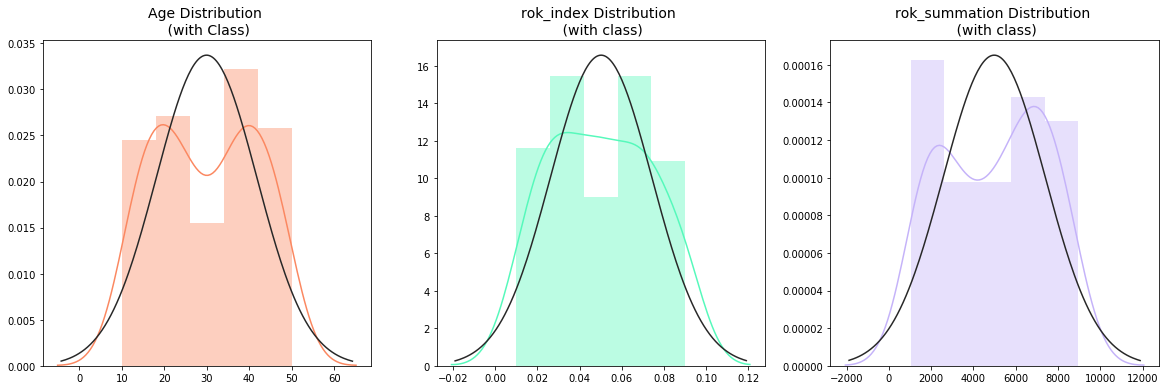

In [106]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_dist = df['age'].loc[df['label'] == 1].values
sns.distplot(v14_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Age Distribution \n (with Class)', fontsize=14)

v12_dist = df['rok_index'].loc[df['label'] == 1].values
sns.distplot(v12_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('rok_index Distribution \n (with class)', fontsize=14)


v10_dist = df['rok_summation'].loc[df['label'] == 1].values
sns.distplot(v10_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('rok_summation Distribution \n (with class)', fontsize=14)


plt.show()


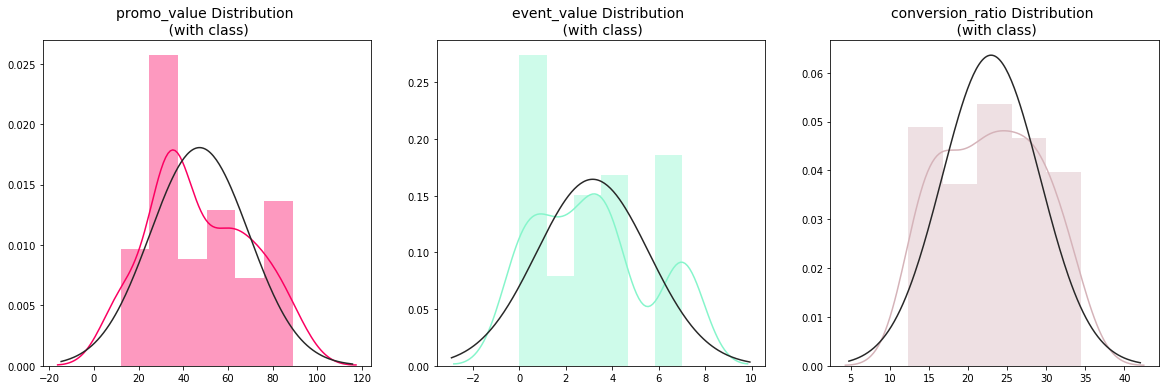

In [115]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v9_dist = df['promo_value'].loc[df['label'] == 1].values
sns.distplot(v9_dist,ax=ax1, fit=norm, color='#FB0061')
ax1.set_title('promo_value Distribution \n (with class)', fontsize=14)


v8_dist = df['event_value'].loc[df['label'] == 1].values
sns.distplot(v8_dist,ax=ax2, fit=norm, color='#86F5CB')
ax2.set_title('event_value Distribution \n (with class)', fontsize=14)

v7_dist = df['conversion_ratio'].loc[df['label'] == 1].values
sns.distplot(v7_dist,ax=ax3, fit=norm, color='#D5B3B9')
ax3.set_title('conversion_ratio Distribution \n (with class)', fontsize=14)

plt.show()

# 3. Classifier Algorithm

In [39]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
    
}

In [40]:
# Accuracy for differ classifier in data model.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 34.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 32.0 % accuracy score
Classifiers:  SVC Has a training score of 37.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 28.999999999999996 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 28.999999999999996 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 30.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 34.0 % accuracy score


# 3.1 Logistic Regression

In [56]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
test_score_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy Score on test data set:', test_score_lr)

Accuracy Score on test data set: 0.2833333333333333


In [57]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df3=pd.read_csv("data.test", header = None, names = columns)


In [58]:
dataTrainlr = df3.values

In [59]:
predictionslr = lr.predict(dataTrainlr)

In [60]:
predictionslr

array([1, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 2, 3, 3, 2, 2,
       3, 3, 1, 2, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 1, 2, 2, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3, 3, 2, 1,
       1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1,
       2, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1], dtype=int64)

In [65]:
labelDictlr = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
predslr = []

for predict1 in predictionslr:
  predslr.append(labelDictlr[predict1])
  

print(predslr)

['a', 'a', 'a', 'b', 'a', 'c', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'c', 'b', 'c', 'c', 'b', 'b', 'c', 'c', 'a', 'b', 'a', 'c', 'b', 'c', 'a', 'a', 'b', 'a', 'a', 'c', 'c', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'b', 'a', 'b', 'b', 'c', 'a', 'a', 'a', 'b', 'c', 'b', 'a', 'a', 'a', 'c', 'c', 'c', 'b', 'a', 'a', 'a', 'c', 'c', 'b', 'a', 'a', 'a', 'a', 'a', 'c', 'c', 'c', 'a', 'c', 'b', 'a', 'c', 'b', 'c', 'a', 'b', 'c', 'c', 'b', 'c', 'c', 'c', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'c', 'a', 'b', 'b', 'c', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'c', 'c', 'c', 'b', 'a', 'a', 'a', 'a', 'c', 'b', 'b', 'b', 'a', 'c', 'a', 'c', 'a', 'b', 'c', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a']


In [66]:
df3['predictions'] = predslr

In [67]:
df3.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions
0,18,0.03,7815,12,4,31.89,a
1,19,0.06,8468,12,0,24.85,a
2,44,0.05,4673,31,1,15.43,a
3,34,0.09,3372,56,2,13.58,b
4,49,0.04,6077,12,4,32.48,a
5,39,0.02,1082,31,2,27.28,c
6,20,0.08,6629,42,4,33.52,b
7,30,0.04,6660,12,4,24.19,a
8,47,0.04,4611,42,1,14.56,a
9,20,0.07,6343,34,3,32.40,b


# 3.2 KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
# Compare predictions to y_test labels
test_score = accuracy_score(y_test, y_pred1)
print('Accuracy Score on test data set:', test_score)

Accuracy Score on test data set: 0.38333333333333336


# KNN-Score:

In [291]:
from sklearn.preprocessing import scale

Xs = scale(X)
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.250000
k-NN score for training set: 0.362500
              precision    recall  f1-score   support

           1       0.19      0.31      0.23        16
           2       0.23      0.32      0.27        19
           3       0.57      0.16      0.25        25

    accuracy                           0.25        60
   macro avg       0.33      0.26      0.25        60
weighted avg       0.36      0.25      0.25        60



In [292]:
#After normalizing with minmax classifier
scaler = preprocessing.StandardScaler().fit(X_train)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_minmax, y_train)
y_pred1=knn.predict(X_test_minmax)
# Compare predictions to y_test labels
test_score1 = accuracy_score(y_test, y_pred1)
print('Accuracy Score on test data set:', test_score1)

Accuracy Score on test data set: 0.2833333333333333


In [293]:
#After normalizing with standard scaler classifier
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_scaler, y_train)
y_pred1=knn.predict(X_test_scaler)
# Compare predictions to y_test labels
test_score2 = accuracy_score(y_test, y_pred1)
print('Accuracy Score on test data set:', test_score2)

Accuracy Score on test data set: 0.25


#  Import test dataset

In [69]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df2=pd.read_csv("data.test", header = None, names = columns)

In [70]:
df2.head()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio
0,18,0.03,7815,12,4,31.89
1,19,0.06,8468,12,0,24.85
2,44,0.05,4673,31,1,15.43
3,34,0.09,3372,56,2,13.58
4,49,0.04,6077,12,4,32.48


In [71]:
dataTrain = df2.values

# 3.2.1 KNN Model to classify the "data.test"

In [72]:
predictions = knn.predict(dataTrain)

In [73]:
predictions

array([2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 1, 1, 3, 2, 2, 3,
       2, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 3, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1], dtype=int64)

In [74]:
labelDict = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
preds = []

for predict in predictions:
  preds.append(labelDict[predict])
 

print(preds)


['b', 'b', 'b', 'c', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'c', 'b', 'a', 'a', 'a', 'a', 'a', 'c', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'c', 'b', 'b', 'b', 'c', 'b', 'a', 'a', 'c', 'b', 'b', 'c', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'c', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'c', 'c', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'c', 'a', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'c', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'c', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'c', 'c', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'c', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a']


In [75]:
df2['predictions'] = preds

In [76]:
#print the test_data with prediction class
df2.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions
0,18,0.03,7815,12,4,31.89,b
1,19,0.06,8468,12,0,24.85,b
2,44,0.05,4673,31,1,15.43,b
3,34,0.09,3372,56,2,13.58,c
4,49,0.04,6077,12,4,32.48,a
5,39,0.02,1082,31,2,27.28,a
6,20,0.08,6629,42,4,33.52,a
7,30,0.04,6660,12,4,24.19,a
8,47,0.04,4611,42,1,14.56,b
9,20,0.07,6343,34,3,32.40,a


# 3.3 Suport vector machine

In [48]:
svm =  SVC(kernel="poly", C=0.025,random_state=101)
svm.fit(X_train, y_train)
y_pred_svm=svm.predict(X_test)
test_score_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy Score on test data set:', test_score_svm)

Accuracy Score on test data set: 0.31666666666666665


In [49]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df4=pd.read_csv("data.test", header = None, names = columns)

In [50]:
dataTrain_svm = df4.values

In [51]:
predictions_svm = svm.predict(dataTrain_svm)

In [53]:
labelDict_svm = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
preds_svm = []

for predict_svm in predictions_svm:
  preds_svm.append(labelDict_svm[predict_svm])
  


In [54]:
df4['predictions_svm'] = preds_svm
df4.head(5)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions_svm
0,18,0.03,7815,12,4,31.89,b
1,19,0.06,8468,12,0,24.85,b
2,44,0.05,4673,31,1,15.43,b
3,34,0.09,3372,56,2,13.58,b
4,49,0.04,6077,12,4,32.48,b


# 3.4 Decision Tree

In [39]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [40]:
y_pred_dt = clf_gini.predict(X_test)
test_score_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy Score on test data set:', test_score_dt)

Accuracy Score on test data set: 0.36666666666666664


In [42]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df5=pd.read_csv("data.test", header = None, names = columns)
dataTrain_dt = df5.values
predictions_dt = clf_gini.predict(dataTrain_dt)

In [43]:
predictions_dt

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 3, 3, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1], dtype=int64)

In [45]:
labelDict_dt = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
preds_dt = []

for predict_dt in predictions_dt:
  preds_dt.append(labelDict_dt[predict_dt])
  


In [47]:
df5['predictions_dt'] = preds_dt
df5.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions_dt
0,18,0.03,7815,12,4,31.89,b
1,19,0.06,8468,12,0,24.85,b
2,44,0.05,4673,31,1,15.43,a
3,34,0.09,3372,56,2,13.58,b
4,49,0.04,6077,12,4,32.48,b
5,39,0.02,1082,31,2,27.28,a
6,20,0.08,6629,42,4,33.52,b
7,30,0.04,6660,12,4,24.19,b
8,47,0.04,4611,42,1,14.56,b
9,20,0.07,6343,34,3,32.40,b


# 3.5 Random Forest classifier

In [64]:
rfc=RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
test_score_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy Score on test data set:', test_score_rfc)

Accuracy Score on test data set: 0.21666666666666667


In [65]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df6=pd.read_csv("data.test", header = None, names = columns)
dataTrain_rfc = df6.values
predictions_rfc = rfc.predict(dataTrain_rfc)

In [66]:
predictions_rfc

array([2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 3, 2, 1, 1, 2, 3, 2, 3, 1, 1, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1,
       1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 1, 2, 2, 2, 1, 1,
       3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1], dtype=int64)

In [67]:
labelDict_rfc = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
preds_rfc = []

for predict_rfc in predictions_rfc:
  preds_rfc.append(labelDict_rfc[predict_rfc])
  

In [68]:
df6['predictions_rfc'] = preds_rfc
df6.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions_rfc
0,18,0.03,7815,12,4,31.89,b
1,19,0.06,8468,12,0,24.85,a
2,44,0.05,4673,31,1,15.43,a
3,34,0.09,3372,56,2,13.58,a
4,49,0.04,6077,12,4,32.48,b
5,39,0.02,1082,31,2,27.28,a
6,20,0.08,6629,42,4,33.52,b
7,30,0.04,6660,12,4,24.19,b
8,47,0.04,4611,42,1,14.56,a
9,20,0.07,6343,34,3,32.40,b


# 3.6 Gradient Boosting Classifier

In [83]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  0.05
Accuracy score (training): 0.558
Learning rate:  0.075
Accuracy score (training): 0.583
Learning rate:  0.1
Accuracy score (training): 0.600
Learning rate:  0.25
Accuracy score (training): 0.696
Learning rate:  0.5
Accuracy score (training): 0.825
Learning rate:  0.75
Accuracy score (training): 0.879
Learning rate:  1
Accuracy score (training): 0.863


In [87]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=6, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred_gbc = gb_clf.predict(X_test)
test_score_gbc = accuracy_score(y_test, y_pred_gbc)
print('Accuracy Score on test data set:', test_score_gbc)

Accuracy Score on test data set: 0.36666666666666664


In [74]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df7=pd.read_csv("data.test", header = None, names = columns)
dataTrain_gbc = df7.values
predictions_gbc = gb_clf.predict(dataTrain_gbc)

In [75]:
predictions_gbc

array([1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1,
       3, 2, 3, 2, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 3,
       2, 2, 2, 2, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3,
       1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 3, 2, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 3, 2, 3, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 1,
       1, 2, 3, 1, 2, 2, 2, 1, 3, 1, 1, 1, 3, 3, 1, 1, 2, 3, 1, 3, 1, 1,
       2, 3, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1], dtype=int64)

In [78]:
labelDict_gbc = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
preds_gbc = []

for predict_gbc in predictions_gbc:
  preds_gbc.append(labelDict_gbc[predict_gbc])

In [79]:
df7['predictions_gbc'] = preds_gbc
df7.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions_gbc
0,18,0.03,7815,12,4,31.89,a
1,19,0.06,8468,12,0,24.85,a
2,44,0.05,4673,31,1,15.43,a
3,34,0.09,3372,56,2,13.58,a
4,49,0.04,6077,12,4,32.48,a
5,39,0.02,1082,31,2,27.28,b
6,20,0.08,6629,42,4,33.52,b
7,30,0.04,6660,12,4,24.19,b
8,47,0.04,4611,42,1,14.56,a
9,20,0.07,6343,34,3,32.40,a


# MLP Classifier

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

In [96]:
mlp =  MLPClassifier()
mlp.fit(X_train_minmax, y_train)
y_pred = mlp.predict(X_test_minmax)
test_score = accuracy_score(y_test, y_pred)
print('Accuracy Score on test data set:', test_score)

Accuracy Score on test data set: 0.2833333333333333


In [97]:
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio']

df8=pd.read_csv("data.test", header = None, names = columns)
dataTrain_mlp = df8.values
predictions_mlp = gb_clf.predict(dataTrain_mlp)

In [98]:
predictions_mlp

array([2, 1, 1, 2, 3, 3, 3, 2, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1,
       3, 2, 1, 2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 1, 2, 1, 3, 1, 2, 3,
       1, 2, 3, 2, 1, 3, 3, 1, 1, 3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1,
       1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3, 2, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 3, 3, 1, 1, 1,
       1, 2, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2,
       1, 3, 3, 3, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1], dtype=int64)

In [99]:
labelDict_mlp = {
    1 : 'a',
    2 : 'b',
    3 : 'c'
}
preds_mlp = []

for predict_mlp in predictions_mlp:
  preds_mlp.append(labelDict_gbc[predict_mlp])

In [101]:
df8['predictions_mlp'] = preds_mlp
df8.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,predictions_gbc,predictions_mlp
0,18,0.03,7815,12,4,31.89,a,b
1,19,0.06,8468,12,0,24.85,a,a
2,44,0.05,4673,31,1,15.43,a,a
3,34,0.09,3372,56,2,13.58,a,b
4,49,0.04,6077,12,4,32.48,a,c
5,39,0.02,1082,31,2,27.28,b,c
6,20,0.08,6629,42,4,33.52,b,c
7,30,0.04,6660,12,4,24.19,b,b
8,47,0.04,4611,42,1,14.56,a,a
9,20,0.07,6343,34,3,32.40,a,a


# Neural Network Structure #Extra

In [137]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

In [138]:
undersample_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 231       
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [139]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 192 samples, validate on 48 samples
Epoch 1/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 2/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 3/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 4/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 5/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 6/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 7/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 8/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 9/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 10/20
 - 0s - loss: 11.4170 - accuracy: 0.2917 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoc